<a href="https://colab.research.google.com/github/truongthuanr/transfer/blob/main/08_SSSMarket_truongthuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import seaborn as sns

In [4]:
train_url = "https://raw.githubusercontent.com/truongthuanr/self-project/main/dataset/sss/train.csv"
df = pd.read_csv(train_url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4705 non-null   int64  
 1   sku                   4705 non-null   int64  
 2   short_description     4640 non-null   object 
 3   price                 4705 non-null   int64  
 4   discount              4705 non-null   int64  
 5   discount_rate         4705 non-null   int64  
 6   rating_average        4705 non-null   float64
 7   review_count          4705 non-null   int64  
 8   order_count           4705 non-null   int64  
 9   favourite_count       4705 non-null   int64  
 10  thumbnail_url         4705 non-null   object 
 11  categories            4705 non-null   object 
 12  liked                 4705 non-null   bool   
 13  rating_summary        4705 non-null   object 
 14  brand                 4705 non-null   object 
 15  current_seller       

In [6]:
df.head()

,id,sku,short_description,price,discount,discount_rate,rating_average,review_count,order_count,favourite_count,thumbnail_url,categories,liked,rating_summary,brand,current_seller,other_sellers,configurable_options,extra_feature,cloth_type
0,0,4777164499549,\n \n- Loại : Quần Thể Thao Đen.\n- Kiểu Dáng ...,99000,101000,51,0.0,0,0,1,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 36387, ""sku"": ""5716562721707"", ""store_i...","[{""id"": 134556, ""name"": ""Mualayeushop"", ""link""...","[{""code"": ""option1"", ""name"": ""Size"", ""position...",[],top_t-shirt_sweatshirt shoe pants
1,1,2931572867679,\nÁo Len Nam Dày Bs33 được may từ chất liệu le...,400000,0,0,0.0,0,0,1,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 10025, ""sku"": ""4689826428364"", ""store_i...",[],"[{""code"": ""option1"", ""name"": ""Màu"", ""position""...",[],sweater
2,2,6427102533481,\n \n- Loại : Quần Âu Thêu Vương Miện\n- Kiểu ...,159000,141000,47,4.5,14,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 9674, ""sku"": ""5288509925221"", ""store_id...",[],"[{""code"": ""option1"", ""name"": ""Size"", ""position...",[],watch shoe shirt_blouse pants
3,3,1590440568400,"Khách vui lòng xem kĩ số đo sản phẩm, hình thậ...",109000,81000,43,4.2,15,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 22226, ""sku"": ""1822886614091"", ""store_i...",[],NaN,[],belt dress bag_wallet shoe
4,4,8690273838961,"sét áo dài cách tân mới chât đẹpsize S,M,Lset ...",290000,160000,36,3.0,3,0,5,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}",NaN,[],"[{""code"": ""option1"", ""name"": ""szie"", ""position...",[],bag_wallet dress shoe


In [7]:
df.thumbnail_url[0]

'https://salt.tikicdn.com/cache/280x280/ts/product/96/e2/3f/d058858d876dd97a6eab9842cdd4d771.jpg'

Total images:

In [8]:
total_images = df.thumbnail_url.notna().sum()
total_images

4705

# Exploratory Data Anaysis

## Label in images

In [9]:
df["cloth_type"] = df.cloth_type.str.split(" ")

In [10]:
labels = df.cloth_type.tolist()
labels = [item if type(item) == list else [str(item)] for item in labels]

In [11]:
all_label = [label for sub in labels for label in sub]

In [12]:
labels_count = Counter(all_label)
# sort by frequency
label_name = [tag for tag,count in labels_count.most_common()]
label_freq = [count for tag,count in labels_count.most_common()]

Encode the label


In [13]:
label_map = {label_name[i]: i for i in range(0,len(label_name))}
inv_label_map = {i:label_name[i] for i in range(0,len(label_name))}

In [14]:
inv_label_map

{0: 'top_t-shirt_sweatshirt',
 1: 'pants',
 2: 'shoe',
 3: 'dress',
 4: 'skirt',
 5: 'shirt_blouse',
 6: 'shorts',
 7: 'watch',
 8: 'bag_wallet',
 9: 'jacket',
 10: 'belt',
 11: 'nan',
 12: 'hat',
 13: 'coat',
 14: 'glasses',
 15: 'sweater',
 16: 'headband_head-covering_hair-accessory',
 17: 'cardigan',
 18: 'jumpsuit',
 19: '',
 20: 'scarf',
 21: 'vest'}

Whichs are the tops used label?

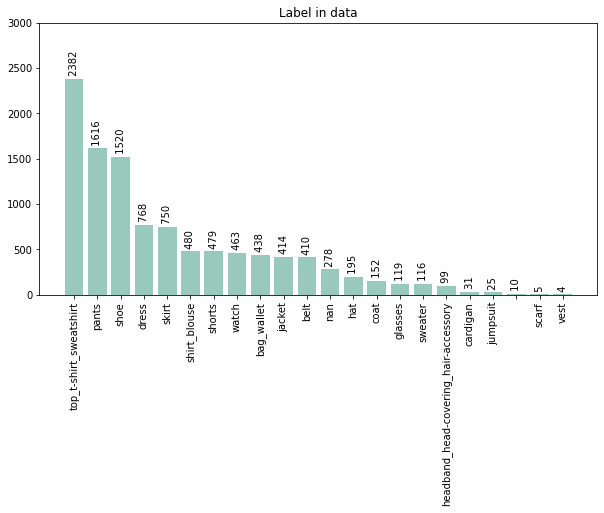

In [15]:
fig = plt.figure(figsize=(10,5))
plt.bar(label_name,label_freq, color="#99C8BC")
plt.title("Label in data")
plt.xticks(rotation=90)
for i, (tag,count) in enumerate(labels_count.most_common()):
  plt.text(i, count, f" {count} ", rotation=90, ha="center", va="bottom", color="black")
plt.ylim(0,3000);


Why is na label?

In [16]:
na_images = df[df.cloth_type.isna() == True].thumbnail_url

## Image

In [17]:
import urllib
from io import StringIO
import requests
from urllib.request import urlopen
from random import randint
from io import BytesIO

In [18]:
images = df.thumbnail_url

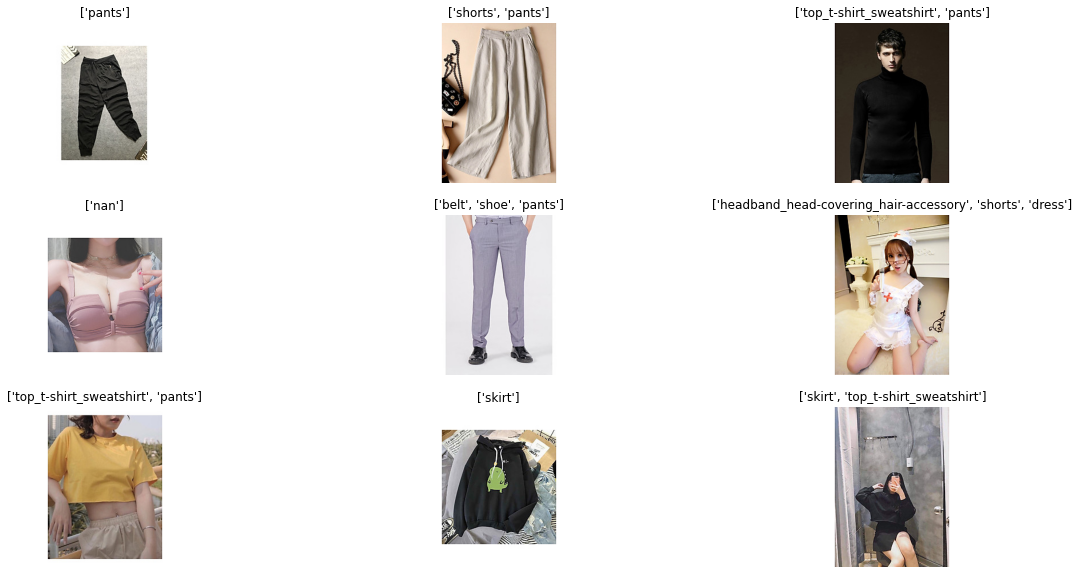

In [19]:
# plot random 9 image
fig = plt.figure(figsize=(20,10))
for i in range(0,9):
  ax = plt.subplot(3,3,i+1)
  _i = randint(0,total_images)
  img = Image.open(urlopen(images[_i]))
  ax = plt.imshow(img)
  plt.title(labels[_i])
  plt.axis("off")

In [62]:
from keras.preprocessing import image
from matplotlib.pyplot import imread
from numpy import asarray
from matplotlib.pyplot import imshow

In [55]:
img = Image.open(urlopen(images[65]))
img = asarray(img)

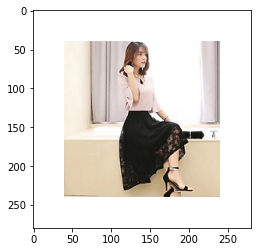

In [63]:
imshow(img)

In [67]:
train_img = []
for i in images[:400]:
  img = Image.open(urlopen(i))
  img = asarray(img)
  img = img/255
  train_img.append(img)

X = np.array(train_img)

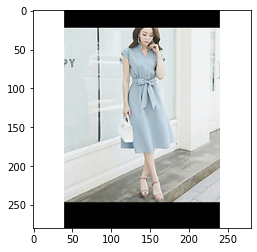

## Download library and pretrain weight

clone repo

In [18]:
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 25.06 MiB/s, done.
Resolving deltas: 100% (562/562), done.


In [19]:
import os 
os.chdir('Mask_RCNN/samples')

In [20]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 92.6 MB 75 kB/s 
     |████████████████████████████████| 42 kB 877 kB/s 
     |████████████████████████████████| 3.2 MB 87.9 MB/s 
     |████████████████████████████████| 367 kB 43.4 MB/s 
     |████████████████████████████████| 50 kB 5.0 MB/s 
     |████████████████████████████████| 4.1 MB 51.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existi

In [21]:
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

... done downloading pretrained model!


In [22]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

In [23]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [24]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

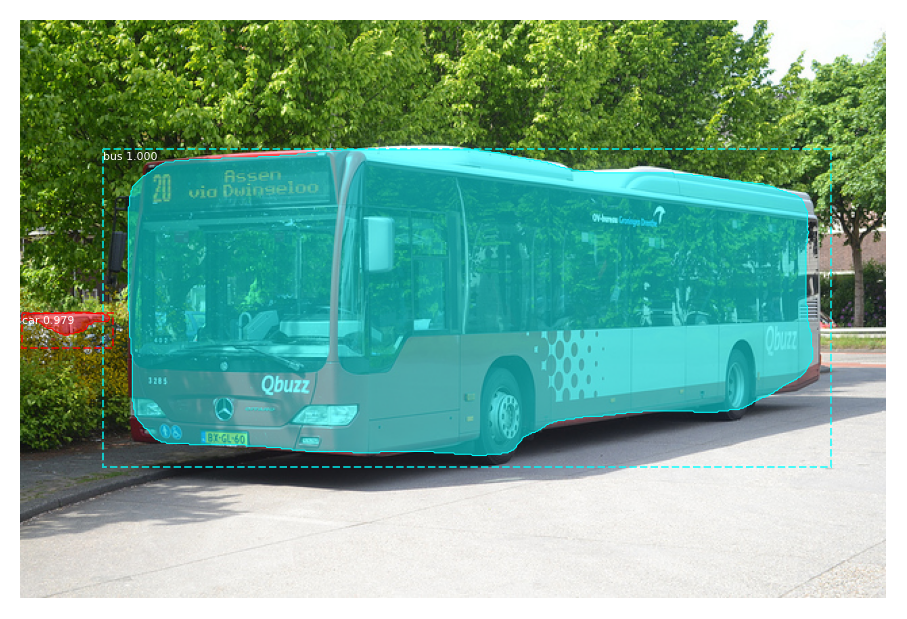

In [25]:
path = '../images/8829708882_48f263491e_z.jpg'
image = skimage.io.imread(path)

# Run detection
results = model.detect([image], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

Set config

In [30]:
from mrcnn.config import Config

In [27]:
NUM_CATS = 46
IMAGE_SIZE = 512

In [31]:
class FashionConfig(Config):
  NAME = "fashion"
  NUM_CLASSES = NUM_CATS + 1
  GPU_COUNT = 1
  IMAGES_PER_GPU = 4 # a memory error occurs when IMAGES_PER_GPU is too high
  BACKBONE = 'resnet50'
  IMAGE_MIN_DIM = IMAGE_SIZE
  IMAGE_MAX_DIM = IMAGE_SIZE    
  IMAGE_RESIZE_MODE = 'none'
  
  RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)
  #DETECTION_NMS_THRESHOLD = 0.0
  
  # STEPS_PER_EPOCH should be the number of instances 
  # divided by (GPU_COUNT*IMAGES_PER_GPU), and so should VALIDATION_STEPS;
  # however, due to the time limit, I set them so that this kernel can be run in 9 hours
  STEPS_PER_EPOCH = 1000
  VALIDATION_STEPS = 200

config = FashionConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                59
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

Function for resize the image

In [32]:
def resize_image(image_path):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)  
  return img

In [53]:
class FashionDataset(utils.Dataset):
  def __init__(self, df):
    super().__init__(self)
    
    # Add classes
    for i, name in enumerate(label_names):
      self.add_class("fashion", i+1, name)
    
    # Add images 
    for i, row in df.iterrows():
      self.add_image("fashion", 
                      image_id=row.name, 
                      path=str(f"{DATA_DIR}/train/{row.name}"), 
                      labels=row['labels'],
                      annotations=row['EncodedPixels'], 
                        height=row['Height'], width=row['Width'])

  def image_reference(self, image_id):
    info = self.image_info[image_id]
    return info['path'], [label_names[int(x)] for x in info['labels']]
    
  def load_image(self, image_id):
        return resize_image(self.image_info[image_id]['path'])

  def load_mask(self, image_id):
    info = self.image_info[image_id]
            
    mask = np.zeros((IMAGE_SIZE, IMAGE_SIZE, len(info['annotations'])), dtype=np.uint8)
    labels = []
    
    for m, (annotation, label) in enumerate(zip(info['annotations'], info['labels'])):
      sub_mask = np.full(info['height']*info['width'], 0, dtype=np.uint8)
      annotation = [int(x) for x in annotation.split(' ')]
      
      for i, start_pixel in enumerate(annotation[::2]):
        sub_mask[start_pixel: start_pixel+annotation[2*i+1]] = 1

      sub_mask = sub_mask.reshape((info['height'], info['width']), order='F')
      sub_mask = cv2.resize(sub_mask, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
      
      mask[:, :, m] = sub_mask
      labels.append(int(label)+1)
            
    return mask, np.array(labels)

In [40]:
image_df = pd.DataFrame({"image_url":images,
                         "labels":labels})
image_df["labels"] = image_df.labels.apply(lambda x: [label_map[i] for i in x])

In [41]:
image_df.head()

,image_url,labels
0,https://salt.tikicdn.com/cache/280x280/ts/prod...,"[0, 2, 1]"
1,https://salt.tikicdn.com/cache/280x280/ts/prod...,[15]
2,https://salt.tikicdn.com/cache/280x280/ts/prod...,"[7, 2, 5, 1]"
3,https://salt.tikicdn.com/cache/280x280/ts/prod...,"[10, 3, 8, 2]"
4,https://salt.tikicdn.com/cache/280x280/ts/prod...,"[8, 3, 2]"


In [43]:
label_names = label_name

0           [0, 2, 1]
1                [15]
2        [7, 2, 5, 1]
3       [10, 3, 8, 2]
4           [8, 3, 2]
            ...      
4700     [7, 2, 5, 1]
4701    [13, 0, 1, 2]
4702              [0]
4703             [11]
4704             [11]
Name: labels, Length: 4705, dtype: object

In [54]:
from pathlib import Path
DATA_DIR = Path('/kaggle/input')

In [55]:
dataset = FashionDataset(image_df)

KeyError: ignored